In [1]:
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
#read the data
file_path = 'hpvdata.csv'
hpvdata = pd.read_csv(file_path)

/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_1885/3811312610.py:3: DtypeWarning: Columns (43) have mixed types. Specify dtype option on import or set low_memory=False.
  hpvdata = pd.read_csv(file_path)


In [3]:
#filter out all records that has NA values on VAX attitude
hpvdata_cleaned = hpvdata.dropna(subset=['HPV_VAX_attitu_s35'])

In [4]:
# Calculate the percentage of available (non-missing) values in each column
available_percentage = 100 - ((hpvdata_cleaned.isnull().sum() / len(hpvdata_cleaned)) * 100)
# Identify columns with more than 50% available values
columns_to_select = available_percentage[available_percentage > 50].index
# Select the columns from the DataFrame
hpvdata_cleaned = hpvdata_cleaned[columns_to_select]

In [5]:
# Generate correlation matrix
corrmatrix  = hpvdata_cleaned.corr()

/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_1885/481184728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix  = hpvdata_cleaned.corr()


In [39]:
corrmatrix  = hpvdata_cleaned.corr()
corrmatrix


/var/folders/b3/kkdtnh4d4gjgrk45d_yrf4100000gn/T/ipykernel_1885/2635644772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix  = hpvdata_cleaned.corr()


,caseid,consent,call_status,sec1_q2,sec1_q3,sec1_q4,sec1_q5,sec1_q6,sec1_q7,sec1_q8,...,sec3_qRb31,sec3_qRb32,sec3_qRb33,Child_VAX_attitu_s35,Child_VAX_attitu_s7a,Child_VAX_attitu_s7b,sec5_qN60,sec5_qN62,sec5_qN63,sec5_qN65
caseid,1.000000,NaN,NaN,NaN,-0.013378,0.028922,-0.053046,-0.002875,0.012622,-0.028071,...,-0.089645,-0.072572,-0.018107,-0.089847,-0.085736,-0.082453,0.070300,0.004764,0.093545,-0.003074
consent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
call_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec1_q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sec1_q3,-0.013378,NaN,NaN,NaN,1.000000,-0.173458,-0.008619,0.009330,0.006349,-0.014018,...,0.055358,0.069876,-0.001396,0.072239,0.074165,0.078569,-0.044272,-0.019964,-0.039078,-0.156494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Child_VAX_attitu_s7b,-0.082453,NaN,NaN,NaN,0.078569,-0.027179,0.078240,-0.028559,-0.043565,-0.065771,...,0.845796,0.807396,0.411997,0.978443,1.000000,1.000000,-0.033342,-0.092221,-0.059452,0.065359
sec5_qN60,0.070300,NaN,NaN,NaN,-0.044272,0.085550,-0.094172,-0.015003,-0.012866,-0.020471,...,-0.003980,0.020794,-0.022638,-0.039315,-0.034036,-0.033342,1.000000,0.338714,0.151745,0.058961
sec5_qN62,0.004764,NaN,NaN,NaN,-0.019964,0.019976,-0.079532,-0.012937,-0.009131,-0.016249,...,-0.058255,-0.047463,-0.040552,-0.099525,-0.092489,-0.092221,0.338714,1.000000,0.092158,-0.044951
sec5_qN63,0.093545,NaN,NaN,NaN,-0.039078,0.062152,-0.036060,-0.014348,-0.010698,-0.018516,...,-0.064264,-0.016162,-0.015127,-0.063623,-0.059250,-0.059452,0.151745,0.092158,1.000000,0.029508


In [6]:
vars_ =  {}
for idx in corrmatrix.index:
    if abs(corrmatrix['HPV_VAX_attitu_s35'][idx])>0.7:
        vars_[idx] = corrmatrix['HPV_VAX_attitu_s35'][idx]

In [7]:
# highly correlated variables
vars_

{'sec3_qNa40': -0.8194895556300539,
 'sec3_qNa41': -0.8288331487679043,
 'sec3_qNa42': -0.7710387294314973,
 'sec3_qNb40': -0.8194895556300539,
 'sec3_qNb41': -0.8288331487679043,
 'sec3_qNb42': -0.7710387294314973,
 'sec3_qRa40': 0.8194895556300534,
 'sec3_qRa41': 0.8288331487679041,
 'sec3_qRa42': 0.7710387294314969,
 'sec3_qRb40': 0.8194895556300534,
 'sec3_qRb41': 0.8288331487679041,
 'sec3_qRb42': 0.7710387294314969,
 'HPV_VAX_attitu_s35': 1.0,
 'HPV_VAX_attitu_s7a': 0.9772577624729988,
 'HPV_VAX_attitu_s7b': 0.9772577624729988}

In [8]:
hpvdata_cleaned['HPV_VAX_attitu_s35']
#higher the value, more negative

0       14.0
1        7.0
2       20.0
3       23.0
4       20.0
        ... 
1339     7.0
1343    16.0
1344     7.0
1345    10.0
1346     7.0
Name: HPV_VAX_attitu_s35, Length: 1035, dtype: float64

In [24]:
df_low_attitude = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']<=np.nanmedian(hpvdata_cleaned['HPV_VAX_attitu_s35'])]
df_high_attitude = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']>np.nanmedian(hpvdata_cleaned['HPV_VAX_attitu_s35'])]


In [25]:
df_high_attitude

,caseid,consent,call_status,sec1_q2,sec1_q3,sec1_q4,sec1_q5,sec1_q6,sec1_q7,sec1_q8,...,sec3_qRb31,sec3_qRb32,sec3_qRb33,Child_VAX_attitu_s35,Child_VAX_attitu_s7a,Child_VAX_attitu_s7b,sec5_qN60,sec5_qN62,sec5_qN63,sec5_qN65
2,10077,1,1,1,1,2,1,5,3,5,...,0.0,0.0,0.0,7.0,0.0,0.0,1.0,1.0,1.0,1.0
3,10086,1,1,1,1,1,3,1,3,3,...,1.0,1.0,0.0,19.0,3.0,3.0,1.0,1.0,1.0,0.0
4,10088,1,1,1,2,1,3,2,3,5,...,1.0,1.0,0.0,19.0,3.0,3.0,1.0,1.0,0.0,0.0
10,10127,1,1,1,2,2,3,4,3,4,...,1.0,1.0,1.0,24.0,4.0,4.0,1.0,1.0,1.0,0.0
12,10149,1,1,1,1,2,3,4,3,4,...,1.0,1.0,1.0,23.0,4.0,4.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,9607,1,1,1,2,2,3,4,3,5,...,1.0,1.0,1.0,23.0,4.0,4.0,1.0,1.0,1.0,0.0
1333,9618,1,1,1,1,1,3,1,3,5,...,1.0,1.0,1.0,22.0,4.0,4.0,1.0,1.0,0.0,0.0
1336,9703,1,1,1,2,2,3,1,3,3,...,1.0,1.0,0.0,18.0,3.0,3.0,1.0,1.0,1.0,0.0
1338,9725,1,1,1,1,1,1,4,3,5,...,1.0,1.0,1.0,20.0,4.0,4.0,1.0,1.0,1.0,0.0


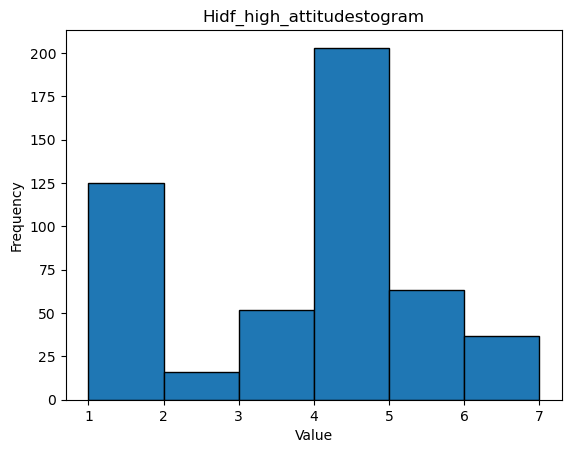

In [38]:
import matplotlib.pyplot as plt
df_high_attitude = df_high_attitude[df_high_attitude['sec1_q6']!=-999]
plt.hist(df_high_attitude['sec1_q6'], bins=6, range=[1,7],edgecolor='black')  # Adjust 'bins' parameter as needed
plt.title('Hidf_high_attitudestogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [10]:
print('median:',np.median(hpvdata_cleaned['HPV_VAX_attitu_s35']))
group1 = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']<=14]
group2 = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']>14]

median: 14.0


In [11]:
name = 'age'
print(name)
print('Score<=14')
print(np.mean(group1[name]))
print('Score>14')
print(np.mean(group2[name]))
print('pvalue')
print(ttest_ind(group1[name],group2[name],equal_var=True).pvalue)

age
Score<=14
40.02420856610801
Score>14
37.70281124497992
pvalue
0.00010547514454224569


In [12]:
name = 'sec1_q8'
print('household income')
print('Score<=17')
print(np.mean(group1[group1[name]>-1][name]))
print('Score>17')
print(np.mean(group2[group2[name]>-1][name]))
print('pvalue')
print(ttest_ind(group1[group1[name]>-1][name],group2[group2[name]>-1][name],equal_var=True).pvalue)

household income
Score<=17
3.921787709497207
Score>17
3.8089430894308944
pvalue
0.10788887072652387


In [13]:
name = 'sec5_q61'
print('61.Have you ever talked about cervical cancer or HPV vaccine with other parents?')
print('Score<=17')
print(np.mean(group1[group1[name]>-1][name]))
print('Score>17')
print(np.mean(group2[group2[name]>-1][name]))
print('pvalue')
print(ttest_ind(group1[group1[name]>-1][name],group2[group2[name]>-1][name],equal_var=True).pvalue)

61.Have you ever talked about cervical cancer or HPV vaccine with other parents?
Score<=17
0.5176908752327747
Score>17
0.5271629778672032
pvalue
0.7609026467414178


In [14]:
name = 'sec5_q62'
print('62.How comfortable do you feel talking about cervical cancer or HPV vaccine with other parents?')
print('Score<=17')
print(np.mean(group1[group1[name]>-1][name]))
print('Score>17')
print(np.mean(group2[group2[name]>-1][name]))
print('pvalue')
print(ttest_ind(group1[group1[name]>-1][name],group2[group2[name]>-1][name],equal_var=True).pvalue)

62.How comfortable do you feel talking about cervical cancer or HPV vaccine with other parents?
Score<=17
2.871268656716418
Score>17
2.78989898989899
pvalue
0.005681646045006216


In [15]:
from scipy.stats import chi2_contingency
observed = np.zeros((2,2))
name = 'sec5_q61'
print('61.Have you ever talked about cervical cancer or HPV vaccine with other parents?')
observed[0,0] = group1[name].value_counts()[1]
observed[0,1] = group2[name].value_counts()[1]
observed[1,0] = group1[name].value_counts()[0]
observed[1,1] = group2[name].value_counts()[0]
chi2, p, dof, expected = chi2_contingency(observed)
print(observed)
print(p)

61.Have you ever talked about cervical cancer or HPV vaccine with other parents?
[[278. 262.]
 [259. 235.]]
0.8085074068216693


In [16]:
name = 'sec1_q9'
print('residence')
observed = np.zeros((3,2))
observed[0,0] = group1[name].value_counts()[3]
observed[0,1] = group2[name].value_counts()[3]
observed[1,0] = group1[name].value_counts()[2]
observed[1,1] = group2[name].value_counts()[2]
observed[2,0] = group1[name].value_counts()[1]
observed[2,1] = group2[name].value_counts()[1]
chi2, p, dof, expected = chi2_contingency(observed)
print(observed)
print(p)

residence
[[285. 208.]
 [160. 172.]
 [ 92. 118.]]
0.0008129056718502946


In [17]:
from scipy.stats import chi2_contingency
name = 'sec5_q62'
print('62.How comfortable do you feel talking about cervical cancer or HPV vaccine with other parents?')
observed = np.zeros((3,2))
observed[0,0] = group1[name].value_counts()[3]
observed[0,1] = group2[name].value_counts()[3]
observed[1,0] = group1[name].value_counts()[2]
observed[1,1] = group2[name].value_counts()[2]
observed[2,0] = group1[name].value_counts()[1]
observed[2,1] = group2[name].value_counts()[1]
chi2, p, dof, expected = chi2_contingency(observed)
print(observed)
print(p)

62.How comfortable do you feel talking about cervical cancer or HPV vaccine with other parents?
[[481. 420.]
 [ 41.  46.]
 [ 14.  29.]]
0.018024772875612945


In [18]:
grouppos = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']<12]
groupneu = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']>=12]
groupneu = groupneu[groupneu['HPV_VAX_attitu_s35']<24]
groupneg = hpvdata_cleaned[hpvdata_cleaned['HPV_VAX_attitu_s35']>=24]


In [19]:
len(groupneg)/len(hpvdata_cleaned)

0.03768115942028986

In [20]:
len(groupneu)/len(hpvdata_cleaned)

0.5091787439613527

In [21]:
len(grouppos)/len(hpvdata_cleaned)

0.45314009661835747

In [22]:
np.mean(groupneg['sec5_q61'])

0.41025641025641024

In [23]:
np.mean(groupneu['sec5_q61'])

0.5475285171102662

In [24]:
np.mean(grouppos['sec5_q61'])

0.5031982942430704

In [25]:
vars_ =  {}
for idx in corrmatrix.index:
    if abs(corrmatrix['sec5_q61'][idx])>0.1:
        vars_[idx] = corrmatrix['sec5_q61'][idx]

In [26]:
vars_

{'sec1_q3': -0.21440486745363035,
 'sec1_q4': 0.17023599508296416,
 'sec4_q56': -0.18303400240134005,
 'sec5_q59': 0.3096729116213058,
 'sec5_q61': 1.0,
 'sec5_q66': 0.457182057460595,
 'sec7_q86_1': 0.11925492112770635,
 'sec7_q86_2': 0.1765702633140199,
 'sec7_q86_3': -0.20871479763231943,
 'sec7_q87': -0.15099794220887733,
 'sec2_q18b': 0.18823485291855976,
 'numberdoses': 0.23126615394481256,
 'AnyHPVdoses': 0.21078953076795165,
 'Female': 0.17023599508296405,
 'education_a': -0.1000532760564491,
 'education_b': 0.10639138819571126,
 'sec5_qN64': 0.12643714209349036,
 'sec7_qN86a': 0.20871479763231943,
 'sec7_qN86b': 0.17869275756108477,
 'sec7_qN87': 0.15099794220887716,
 'sec7_q87_q88': 0.2436701493397152,
 'sec3_qNa39': 0.10117518101768398,
 'sec3_qNb39': 0.10117518101768398,
 'sec3_qRa39': -0.10117518101768398,
 'sec3_qRb39': -0.10117518101768398,
 'sec5_qN65': 0.25071384483978393}

In [27]:
selected_data = hpvdata_cleaned[['HPV_VAX_attitu_s35','sec5_q61','age','sec1_q5','sec1_q6','sec1_q7','sec1_q8','sec1_q9','education_a']]
data = selected_data.dropna()
df_encoded = pd.get_dummies(data[['age','sec1_q5','sec1_q6','sec1_q7','sec1_q8','sec1_q9','education_a']], columns=['sec1_q5','sec1_q6','sec1_q7','sec1_q8','sec1_q9','education_a'])


In [39]:
y = data['HPV_VAX_attitu_s35'].values.copy()
X = df_encoded.values.copy()
for i in range(len(y)):
    if y[i]>=20:
        y[i] = 1
    else:
        y[i] = 0

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
class_weights = {0: 1.0, 1: 1}
svc = SVC(kernel='rbf', probability=True, class_weight=class_weights)
param_grid = {'C': [0.1, 1, 10]}


In [42]:
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight={0: 1.0, 1: 1}, probability=True),
             param_grid={'C': [0.1, 1, 10]}, scoring='roc_auc')

In [43]:
best_C = grid_search.best_params_['C']
best_svc = grid_search.best_estimator_

In [44]:
best_svc

SVC(C=0.1, class_weight={0: 1.0, 1: 1}, probability=True)

In [45]:
y_pred = best_svc.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.797427652733119


In [47]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [37]:
y_scores = best_svc.predict_proba(X_test)[:, 1]

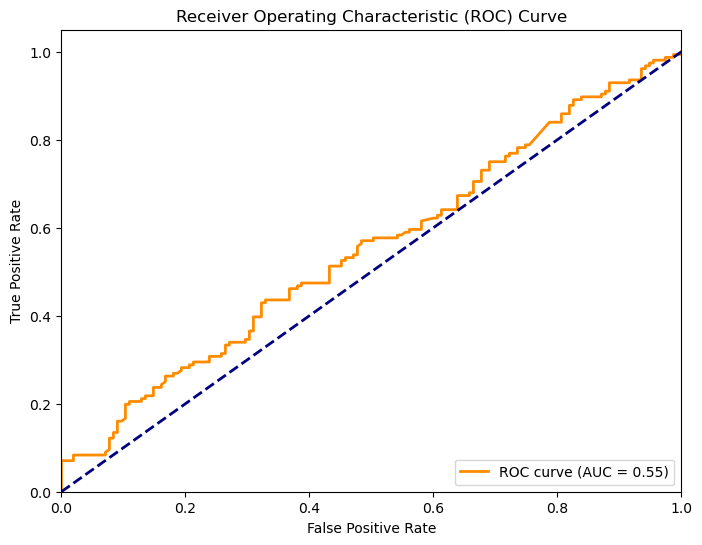

In [38]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

